# Sep ??st, 2021

**Motivation**: fig 2 <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(128))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

In [3]:
k = 13
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC')
group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

current expt: 'p20'

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k13

## Load group results

In [4]:
available = [
    e for e in os.listdir(group_dir)
    if '(0.2,1.0;4)' in e
]
file = sorted(available, key=sort_date_latest)[-1]
group = np.load(pjoin(group_dir, file), allow_pickle=True).item()

print(file)

group_bins(0.2,1.0;4)_(2021_09_14).npy

In [6]:
for k in range(3, 18):
    group, svinets, group_dir = group_results_svinet(
        mice=mice,
        k=k,
        p=p,
        num_cuts=4,
        bin_edges=(0.2, 1.),
        global_order=False,
        dist_metric='cosine',
        **svinet_props,
    )

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k3

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k4

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k5

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k6

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k7

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k8

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k9

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k10

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k11

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k12

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k13

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k14

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k15

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k16

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] 'group_bins(0.2,1.0;4)_(2021_09_15).npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k17

In [1]:
len(range(3, 18))

15

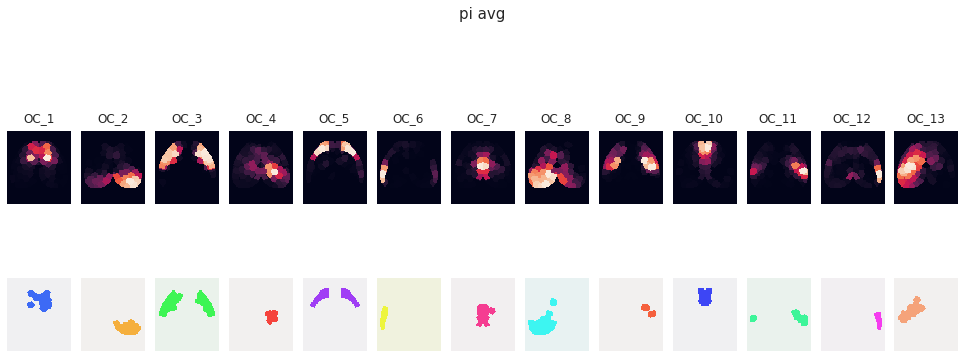

In [51]:
fig, axes = create_figure(2, k, (13.5, 5.8))

pi_arr = svinet.pi2arr(group['pi_avg'], cortex_only=True)
masks = svinet.masks_from_pi(group['pi_avg'], disjoint=True, cortex_only=True)
disjoint_arr = {
    idx: project_vol_2d(m, mice.allen['dims_flat'], 'max_proj')
    for idx, m in masks.items()
}
for j in range(k):
    im = axes[0, j].imshow(pi_arr[j + 1], cmap='rocket', vmin=0)
    _ = axes[1, j].imshow(disjoint_arr[j + 1], cmap=svinet.cmaps[j + 1])
    axes[0, j].set_title(f"OC_{j + 1}", y=1.04)
remove_ticks(axes)
fig.suptitle("pi avg", fontsize=15, y=1.03)
plt.show()

In [52]:
metric = 'cosine'
dlist = []
for i, context in {0: 'between_ses', 1: 'between_sub'}.items():
    x = np.nanmean(group['gam'], i)
    h = sp_stats.entropy(x, axis=-2) / np.log(k)
    nonan = np.where(np.isnan(x).sum(0).sum(0) == 0)[0]
    
    for a, b in itertools.combinations(range(len(x)), 2):
        d = sp_dist.cdist(
            XA=x[a][..., nonan],
            XB=x[b][..., nonan],
            metric=metric,
        )
        s = dist2sim(d)
        dlist.append({
            'num_k': [k] * k,
            'label': ['OCs'] * k,
            'context': [context] * k,
            'metric': [metric] * k,
            'a': [a] * k,
            'b': [b] * k,
            'node': [-1] * k,
            'oc_idx': range(1, 1 + k),
            'score': np.diag(s),
        })

        d = sp_dist.cdist(
            XA=x[a][..., nonan].T,
            XB=x[b][..., nonan].T,
            metric=metric,
        )
        s = dist2sim(d)
        dlist.append({
            'num_k': [k] * len(nonan),
            'label': ['Nodes'] * len(nonan),
            'context': [context] * len(nonan),
            'metric': [metric] * len(nonan),
            'a': [a] * len(nonan),
            'b': [b] * len(nonan),
            'node': nonan,
            'oc_idx': [-1] * len(nonan),
            'score': np.diag(s),
        })
        
        d = sp_dist.cosine(h[a, nonan], h[b, nonan])
        dlist.append({
            'num_k': [k],
            'label': ['Entropies'],
            'context': [context],
            'metric': [metric],
            'a': [a],
            'b': [b],
            'node': [-1],
            'oc_idx': [-1],
            'score': [dist2sim(d)],
        })
df_score = pd.DataFrame(merge_dicts(dlist))

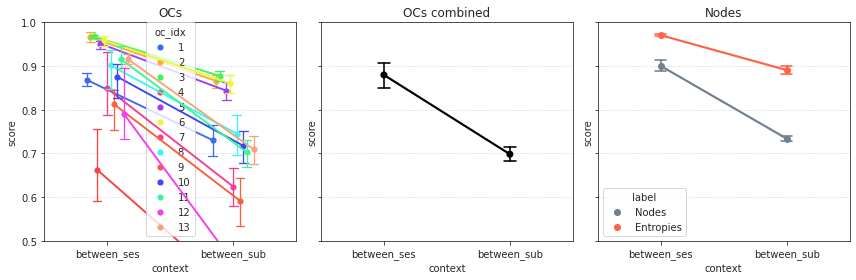

In [53]:
fig, axes = create_figure(1, 3, (12, 4.0), 'ticks', 'all', 'all')

_df = df_score.loc[df_score.label == 'OCs']
sns.pointplot(
    data=_df,
    x='context',
    y='score',
    hue='oc_idx',
    palette=svinet.colors,
    dodge=True,
    scale=0.7,
    capsize=0.07,
    errwidth=1.3,
    ax=axes[0],
)
axes[0].set_title('OCs')
axes[0].grid(axis='y')

sns.pointplot(
    data=_df,
    x='context',
    y='score',
    color='k',
    dodge=False,
    scale=0.8,
    capsize=0.09,
    errwidth=1.6,
    ax=axes[1],
)
axes[1].set_title('OCs combined')
axes[1].grid(axis='y')

_df = df_score.loc[df_score.label != 'OCs']
sns.pointplot(
    data=_df,
    x='context',
    y='score',
    hue='label',
    palette={'Nodes': 'slategrey', 'Entropies': 'tomato'},
    dodge=False,
    scale=0.8,
    capsize=0.09,
    errwidth=1.6,
    ax=axes[2],
)
axes[2].set_title('Nodes')
axes[2].grid(axis='y')
axes[0].set_ylim(0.5, 1.0)
plt.show()

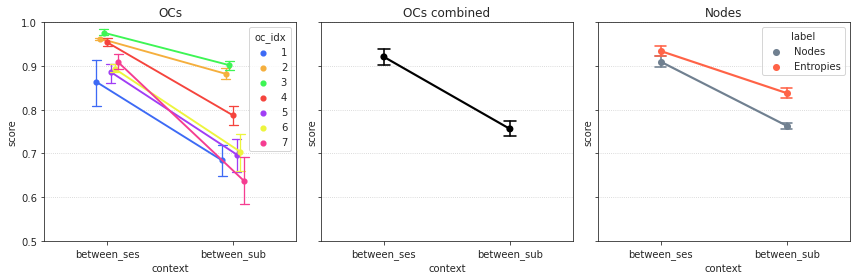

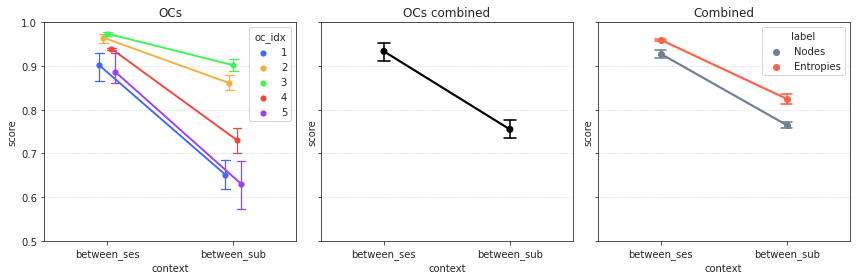

In [22]:
_pi.shape

(3, 8, 138)

In [43]:
for i in range(k):
    spear = sp_stats.spearmanr(_pi[0, i], _pi[2, i])
    print(i, spear)

0
SpearmanrResult(correlation=0.4637399569395578, pvalue=1.0147384418681077e-08)

1
SpearmanrResult(correlation=0.8443887860197401, pvalue=1.1048942217560435e-38)

2
SpearmanrResult(correlation=0.8282924913639381, pvalue=5.006538124400893e-36)

3
SpearmanrResult(correlation=0.8248220845729, pvalue=1.7224136353599292e-35)

4
SpearmanrResult(correlation=0.50034361593556, pvalue=4.137755537329846e-10)

5
SpearmanrResult(correlation=0.42213617236962564, pvalue=2.509440477181399e-07)

6
SpearmanrResult(correlation=0.6510186328880405, pvalue=5.423580633570306e-18)

7
SpearmanrResult(correlation=0.4236567585030674, pvalue=2.2483909087124933e-07)

In [28]:
spear.correlation

0.6678455394998504

In [48]:
dist2sim(sp_dist.cosine(_gam[1, -1], _gam[2, -1]))

0.8630948131479369

In [44]:
_gam.shape

(3, 8, 138)

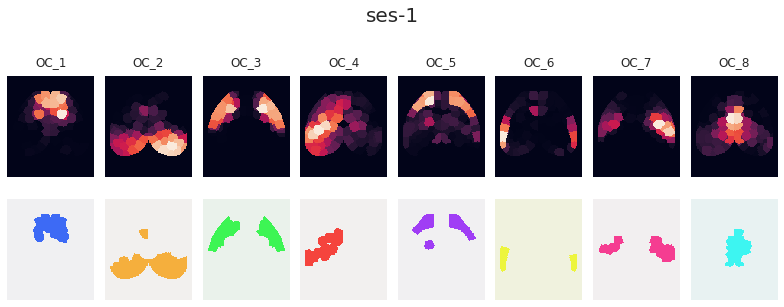

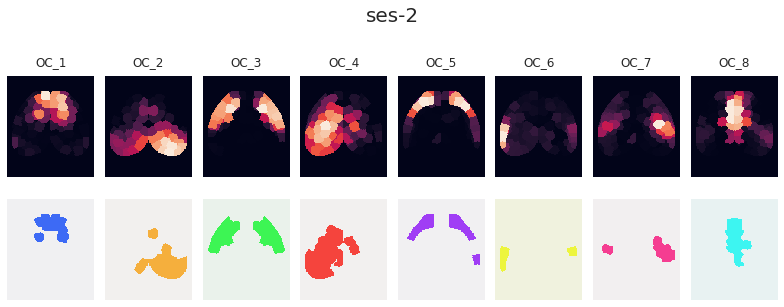

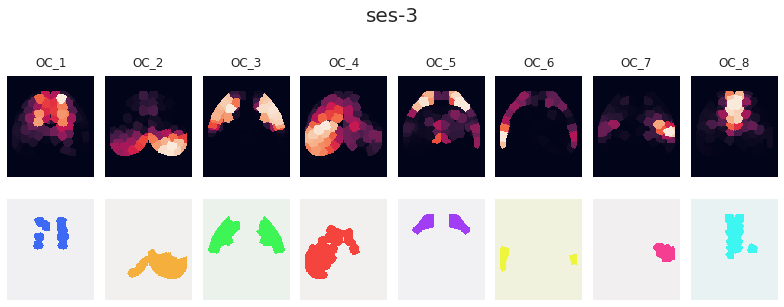

In [20]:
_gam = np.nanmean(group['gam'], 0)
_pi = _gam / np.nansum(_gam, -2, keepdims=True)

for i in range(3):
    fig, axes = create_figure(2, k, (11, 4.5))
    
    pi_arr = svinet.pi2arr(_pi[i], cortex_only=True)
    masks = svinet.masks_from_pi(_pi[i], disjoint=True, cortex_only=True)
    disjoint_arr = {
        idx: project_vol_2d(m, mice.allen['dims_flat'], 'max_proj')
        for idx, m in masks.items()
    }
    for j in range(k):
        im = axes[0, j].imshow(pi_arr[j + 1], cmap='rocket', vmin=0)
        _ = axes[1, j].imshow(disjoint_arr[j + 1], cmap=svinet.cmaps[j + 1])
        axes[0, j].set_title(f"OC_{j + 1}", y=1.04)
    remove_ticks(axes)
    fig.suptitle(f"ses-{i+1}", fontsize=20, y=1.01)
    plt.show()
    print('\n')

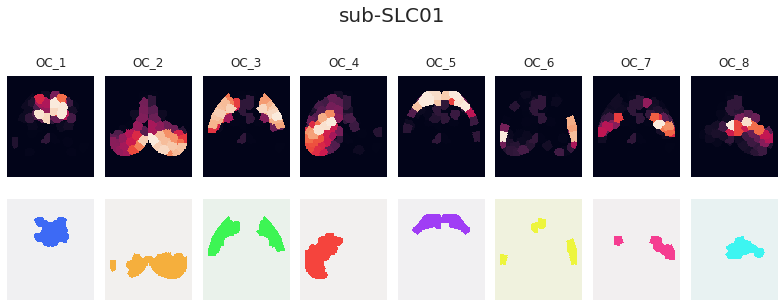

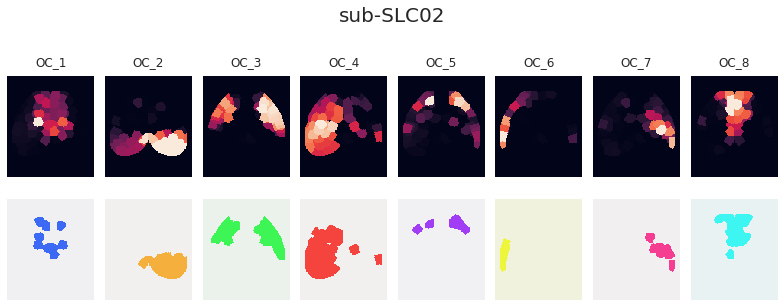

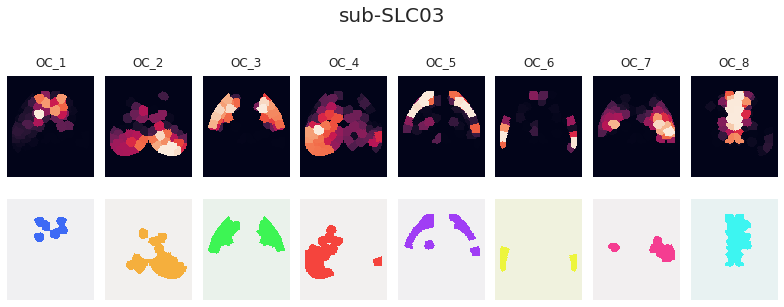

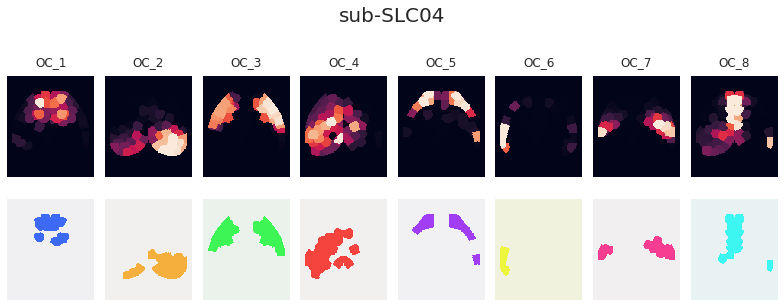

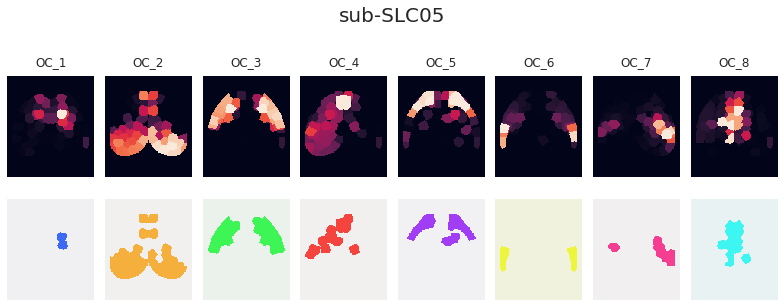

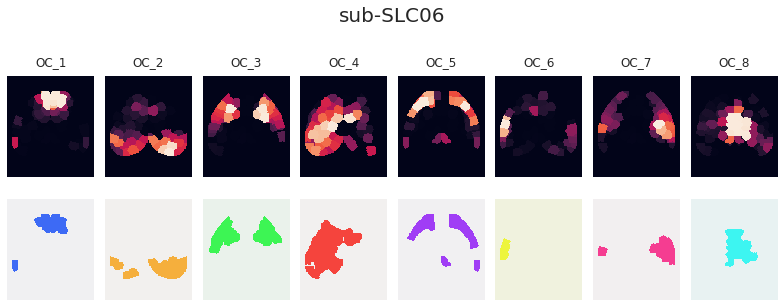

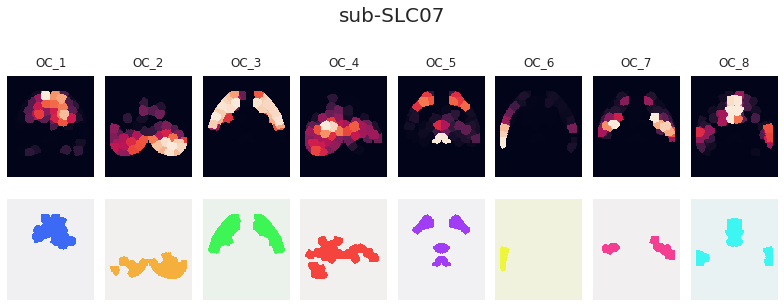

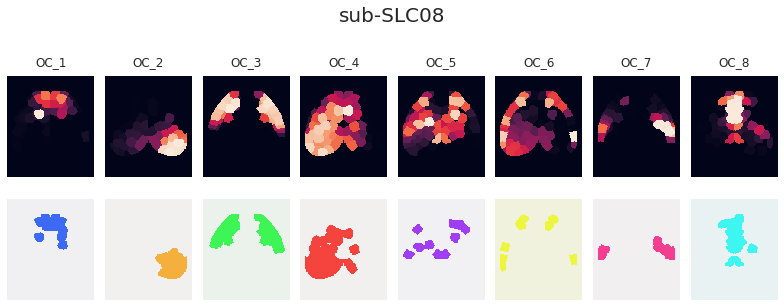

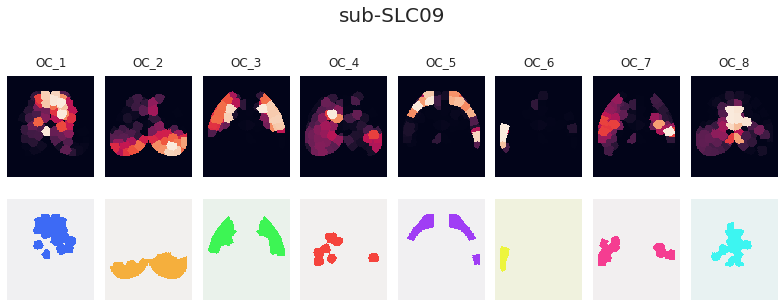

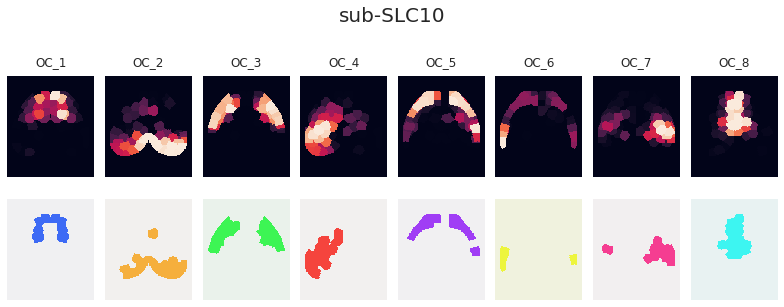

In [19]:
_gam = np.nanmean(group['gam'], 1)
_pi = _gam / np.nansum(_gam, -2, keepdims=True)

for i in range(10):
    fig, axes = create_figure(2, k, (11, 4.5))
    
    pi_arr = svinet.pi2arr(_pi[i], cortex_only=True)
    masks = svinet.masks_from_pi(_pi[i], disjoint=True, cortex_only=True)
    disjoint_arr = {
        idx: project_vol_2d(m, mice.allen['dims_flat'], 'max_proj')
        for idx, m in masks.items()
    }
    for j in range(k):
        im = axes[0, j].imshow(pi_arr[j + 1], cmap='rocket', vmin=0)
        _ = axes[1, j].imshow(disjoint_arr[j + 1], cmap=svinet.cmaps[j + 1])
        axes[0, j].set_title(f"OC_{j + 1}", y=1.04)
    remove_ticks(axes)
    fig.suptitle(f"{mice.get_key(i+1)}", fontsize=20, y=1.01)
    plt.show()
    print('\n')

In [21]:
df_score.loc[df_score.oc_idx == 8]

,num_k,label,context,metric,a,b,node,oc_idx,score
7,8,OCs,between_ses,cosine,0,1,-1,8,0.646600
154,8,OCs,between_ses,cosine,0,2,-1,8,0.464435
301,8,OCs,between_ses,cosine,1,2,-1,8,0.863095
448,8,OCs,between_sub,cosine,0,1,-1,8,0.187528
593,8,OCs,between_sub,cosine,0,2,-1,8,0.214491
738,8,OCs,between_sub,cosine,0,3,-1,8,0.243222
883,8,OCs,between_sub,cosine,0,4,-1,8,0.306276
1028,8,OCs,between_sub,cosine,0,5,-1,8,0.614677
1173,8,OCs,between_sub,cosine,0,6,-1,8,0.137320
1318,8,OCs,between_sub,cosine,0,7,-1,8,0.317923
